In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

pd.set_option('display.max_rows', 500)

# Data Preparation

1. Focus always to understand the final data structure
2. Support each stap by visual analytics

## John Hopkins GITHUB csv data

In [2]:
data_path = '../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
country_list = ['Italy', 'US', 'Spain', 'Germany', 'Korea, South']


pd_raw = pd.read_csv(data_path)
time_idx = pd_raw.columns[4:]

df_plot = pd.DataFrame({'date':time_idx})
#print(df_plot.head())

#len(pd_raw['Country/Region'].unique())
#print(pd_raw['Country/Region'])
#pd_raw[pd_raw['Country/Region'] == 'Germany'].iloc[:,4::].sum(axis=0)[0:4]

for each in country_list:
    df_plot[each] = np.array(pd_raw[pd_raw['Country/Region'] == each].iloc[:,4::].sum(axis=0))
    
df_plot

,date,Italy,US,Spain,Germany,"Korea, South"
0,1/22/20,0,1,0,0,1
1,1/23/20,0,1,0,0,1
2,1/24/20,0,2,0,0,2
3,1/25/20,0,2,0,0,2
4,1/26/20,0,5,0,0,3
5,1/27/20,0,5,0,1,4
6,1/28/20,0,5,0,4,4
7,1/29/20,0,5,0,4,4
8,1/30/20,0,5,0,4,4
9,1/31/20,2,7,0,5,11


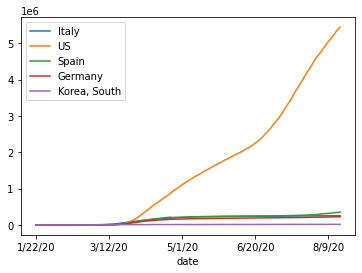

In [3]:
%matplotlib inline

df_plot.set_index('date').plot()
#print(df_plot.date)

#type(df_plot.date[0])


In [4]:
time_idx = [datetime.strptime(each, "%m/%d/%y") for each in df_plot.date] # convert datetime
time_str = [each.strftime('%y-%m-%d') for each in time_idx] # convert date to ISO norm
# time_str[0:5]


In [5]:
df_plot['date'] = time_idx
type(df_plot['date'][0])
df_plot.head()


,date,Italy,US,Spain,Germany,"Korea, South"
0,2020-01-22,0,1,0,0,1
1,2020-01-23,0,1,0,0,1
2,2020-01-24,0,2,0,0,2
3,2020-01-25,0,2,0,0,2
4,2020-01-26,0,5,0,0,3


In [6]:
df_plot.to_csv('../data/processed/COVID_small_flat_table.csv', sep=';', index=False)

## Relational data model - defining a primary key

In the relational model of databases, a primary key is a specific choice of a minimal set of attributes (columns) that uniquely specify a tuple (row) in a relation (table) (source: wiki)


A primary key’s main features are:

* It must contain a unique value for each row of data.
* It cannot contain null values.

In [7]:
data_path = '../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
pd_raw = pd.read_csv(data_path)
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,37054,37054,37162,37269,37345,37424,37431,37551,37596,37599
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,6275,6411,6536,6676,6817,6971,7117,7260,7380,7499
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,34693,35160,35712,36204,36699,37187,37664,38133,38583,39025
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,955,955,963,963,977,981,989,989,989,1005
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1572,1672,1679,1735,1762,1815,1852,1879,1906,1935


In [8]:
pd_data_base = pd_raw.rename(columns={'Country/Region':'country', 'Province/State':'state'})
pd_data_base = pd_data_base.drop(['Lat', 'Long'], axis=1)
pd_data_base.head()

,state,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,37054,37054,37162,37269,37345,37424,37431,37551,37596,37599
1,NaN,Albania,0,0,0,0,0,0,0,0,...,6275,6411,6536,6676,6817,6971,7117,7260,7380,7499
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,34693,35160,35712,36204,36699,37187,37664,38133,38583,39025
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,955,955,963,963,977,981,989,989,989,1005
4,NaN,Angola,0,0,0,0,0,0,0,0,...,1572,1672,1679,1735,1762,1815,1852,1879,1906,1935


In [19]:
test_pd = pd_data_base.set_index(['state', 'country']).T
#test_pd.columns
test_pd.stack(level=[0,1]).reset_index()

,level_0,state,country,0
0,1/22/20,NaN,Afghanistan,0.0
1,1/22/20,NaN,Albania,0.0
2,1/22/20,NaN,Algeria,0.0
3,1/22/20,NaN,Andorra,0.0
4,1/22/20,NaN,Angola,0.0
...,...,...,...,...
94463,8/17/20,Zhejiang,West Bank and Gaza,16844.0
94464,8/17/20,Zhejiang,Western Sahara,10.0
94465,8/17/20,Zhejiang,Yemen,1882.0
94466,8/17/20,Zhejiang,Zambia,9839.0


In [10]:
pd_relational_model = pd_data_base.set_index(['state', 'country']) \
                            .T \
                            .stack(level=[0,1]) \
                            .reset_index() \
                            .rename(columns={'Country/Region':'country', 'Province/State':'state'}) \
                            .rename(columns={'level_0':'date', 0:'confirmed'})

pd_relational_model.head()

,date,state,country,confirmed
0,1/22/20,NaN,Afghanistan,0.0
1,1/22/20,NaN,Albania,0.0
2,1/22/20,NaN,Algeria,0.0
3,1/22/20,NaN,Andorra,0.0
4,1/22/20,NaN,Angola,0.0


In [11]:
pd_relational_model['date'] = pd_relational_model.date.astype('datetime64[s]')
pd_relational_model.dtypes

date         datetime64[ns]
state                object
country              object
confirmed           float64
dtype: object

In [12]:
pd_relational_model.to_csv('../data/processed/COVID_relational_confirmed.csv', sep=';', index=False)

# Group-by apply

In [13]:
! python3 ../src/data/process_JH_data.py
pd_JH_data = pd.read_csv('../data/processed/COVID_relational_confirmed.csv', sep=';', parse_dates=[0])
pd_JH_data = pd_JH_data.sort_values('date', ascending = True).reset_index(drop=True).copy()
pd_JH_data.head()

 Number of rows stored: 55594


,date,state,country,confirmed
0,2020-01-22,Alberta,Canada,0.0
1,2020-01-22,no,"Korea, South",1.0
2,2020-01-22,no,Kosovo,0.0
3,2020-01-22,no,Kuwait,0.0
4,2020-01-22,no,Kyrgyzstan,0.0


In [14]:
test_data = pd_JH_data[((pd_JH_data['country']=='US') |
                      (pd_JH_data['country']=='Germany')) &
                      (pd_JH_data['date'] > '2020-03-20')
                      ]

In [15]:
test_data

,date,state,country,confirmed
15737,2020-03-21,no,Germany,22213.0
15777,2020-03-21,no,US,25825.0
16001,2020-03-22,no,Germany,24873.0
16041,2020-03-22,no,US,33761.0
16269,2020-03-23,no,Germany,29056.0
16309,2020-03-23,no,US,43850.0
16534,2020-03-24,no,Germany,32986.0
16576,2020-03-24,no,US,54112.0
16800,2020-03-25,no,Germany,37323.0
16840,2020-03-25,no,US,66055.0


In [16]:
test_data.groupby(['country']).agg(np.max)

,date,state,confirmed
country,,,
Germany,2020-08-17,no,226700.0
US,2020-08-17,no,5438325.0


In [17]:
# %load ../src/features/build_features.py

import numpy as np
from sklearn import linear_model
reg = linear_model.LinearRegression(fit_intercept=True)
import pandas as pd

from scipy import signal


def get_doubling_time_via_regression(in_array):
    ''' Use a linear regression to approximate the doubling rate

        Parameters:
        ----------
        in_array : pandas.series

        Returns:
        ----------
        Doubling rate: double
    '''

    #y = np.array(in_array['confirmed'])
    #X = np.arange(len(y)).reshape(-1, 1)
    y = np.array(in_array)
    X = np.arange(-1,2).reshape(-1, 1)

    #assert len(in_array) == 3
    reg.fit(X,y)
    intercept = reg.intercept_
    slope = reg.coef_

    return intercept/slope


def rolling_reg(df_input,col='confirmed'):
    ''' Rolling Regression to approximate the doubling time'

        Parameters:
        ----------
        df_input: pd.DataFrame
        col: str
            defines the used column
        Returns:
        ----------
        result: pd.DataFrame
    '''
    days_back=3
    result=df_input[col].rolling(
                window=days_back,
                min_periods=days_back).apply(get_doubling_time_via_regression,raw=False)



    return result


if __name__ == '__main__':
    test_data_LR= np.array([2,4,6])
    result = get_doubling_time_via_regression(test_data_LR)
    print('the test slope is: ' + str(result))

    

the test slope is: [2.]


In [18]:
test_data.groupby(['state', 'country']).apply(get_doubling_time_via_regression)

TypeError: float() argument must be a string or a number, not 'Timestamp'

In [ ]:
test_data[['state', 'country', 'confirmed',]].groupby(['state', 'country']).apply(rolling_reg,'confirmed')

In [ ]:
pd_result_larg=pd.merge(pd_JH_data,pd_DR_result[['index','confirmed_DR']],on=['index'],how='left')
pd_result_larg.head()

# Filtering the data with groupby apply 

In [ ]:
from scipy import signal

def savgol_filter(df_input,column='confirmed',window=5):
    ''' Savgol Filter which can be used in groupby apply function 
        it ensures that the data structure is kept'''
    window=5, 
    degree=1
    df_result=df_input
    
    filter_in=df_input[column].fillna(0) # attention with the neutral element here
    
    result=signal.savgol_filter(np.array(filter_in),
                           5, # window size used for filtering
                           1)
    df_result[column+'_filtered']=result
    return df_result
        

In [ ]:
pd_filtered_result=pd_JH_data[['state','country','confirmed']].groupby(['state','country']).apply(savgol_filter).reset_index()

In [ ]:
pd_result_larg=pd.merge(pd_result_larg,pd_filtered_result[['index','confirmed_filtered']],on=['index'],how='left')
pd_result_larg.head()

# Filtered doubling rate

In [ ]:
pd_filtered_doubling=pd_result_larg[['state','country','confirmed_filtered']].groupby(['state','country']).apply(rolling_reg,'confirmed_filtered').reset_index()

pd_filtered_doubling=pd_filtered_doubling.rename(columns={'confirmed_filtered':'confirmed_filtered_DR',
                             'level_2':'index'})

pd_filtered_doubling.tail()

In [ ]:
pd_result_larg=pd.merge(pd_result_larg,pd_filtered_doubling[['index','confirmed_filtered_DR']],on=['index'],how='left')
pd_result_larg.tail()